In [14]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

In [3]:
#On les récupère en fichier npz :

def load_embeddings_npz(npz_path):
  """
  input : nom du fichier npz qui contient les embeddings
  retourne un dictionnaire les contenant
  """
  npz_data = np.load(npz_path)
  return {key: npz_data[key] for key in npz_data.files}

In [5]:
embeddings_original = load_embeddings_npz('/content/cyanobact.original.long.prots.npz')
embeddings_shuffle = load_embeddings_npz('/content/cyanobact.long.prots.shuffled.npz')
array_embeddings_original=np.array(embeddings_original['embeddings'])
array_embeddings_shuffle=np.array(embeddings_shuffle['embeddings'])

print(type(embeddings_original))
cles = embeddings_original.keys()
print(cles)

<class 'dict'>
dict_keys(['headers', 'embeddings', 'input_fasta', 'tm_vec_weights', 'protrans_model_path'])


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


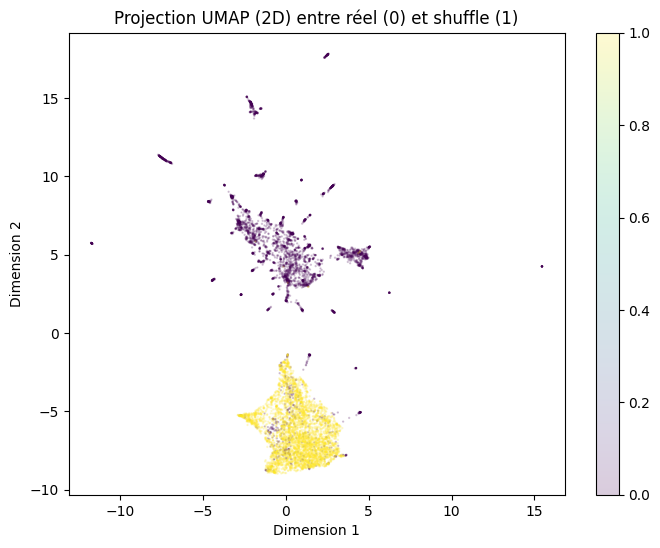

In [6]:
# Charger le jeu de données exemple
data_reel=array_embeddings_original

data_shuffle=array_embeddings_shuffle


#  label arrays
y_reel = np.array([0] * len(data_reel))
y_shuffle = np.array([1] * len(data_shuffle))

# concatenation
X = np.vstack([data_reel, data_shuffle])
y = np.concatenate([y_reel, y_shuffle])

# Standardisation
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, alpha=0.2, s=0.5)
plt.colorbar()
plt.title("Projection UMAP (2D) entre réel (0) et shuffle (1)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


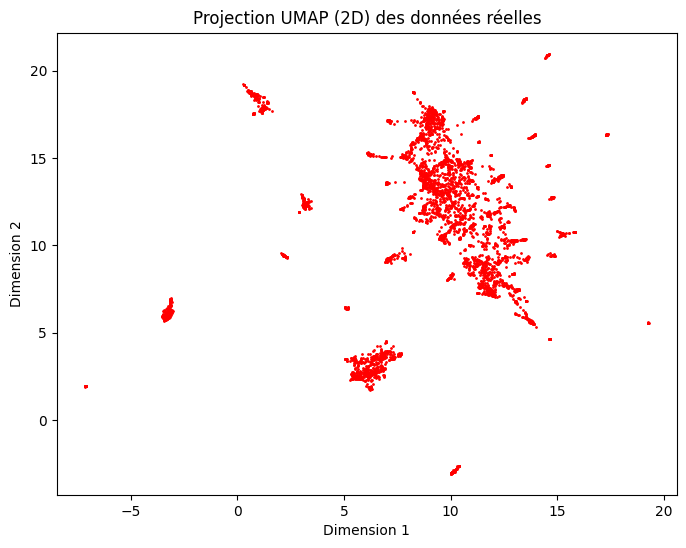

In [7]:
# Charger le jeu de données
data_reel=array_embeddings_original

X = data_reel # Données d'entrée : vecteurs

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red", s=1)
plt.title("Projection UMAP (2D) des données réelles")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
embeddings_swissprot = load_embeddings_npz('/content/big_chunk_0_1_2_combined.npz')
array_embeddings_swissprot=np.array(embeddings_swissprot['embeddings'])

df = pd.DataFrame({'col':array_embeddings_swissprot})
print(df.shape)

In [ ]:
#Cyanobactéries issues de UniProt (330 000 bactéries)
# Charger le jeu de données
embeddings_swissprot = load_embeddings_npz('/content/big_chunk_0_1_2_combined.npz')
array_embeddings_swissprot=np.array(embeddings_swissprot['embeddings'])

X = array_embeddings_swissprot # Données d'entrée : vecteurs
print(len(X))
# Sélection de 10% aléatoirement
X = random.choices(X, k=int(len(X)*0.1))
print(len(X))

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="green", alpha=0.5, s=0.5)
plt.title("Projection UMAP (2D) des données issues de UniProt")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
data_reel = array_embeddings_original
data_shuffle = array_embeddings_shuffle
data_swissprot = array_embeddings_swissprot

# Create label arrays
y_reel = np.array(["real"] * len(data_reel))
y_shuffle = np.array(["shuffled"] * len(data_shuffle))
y_swissprot = np.array(["swissprot"] * len(data_swissprot))

# Concatenate all data and labels
X = np.vstack([data_reel, data_shuffle, data_swissprot])
y = np.concatenate([y_reel, y_shuffle, y_swissprot])

# Standardize
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


limites axe x : -17.938427734375, 17.662625122070313
limites axe y : -18.50574254989624, 17.739646434783936


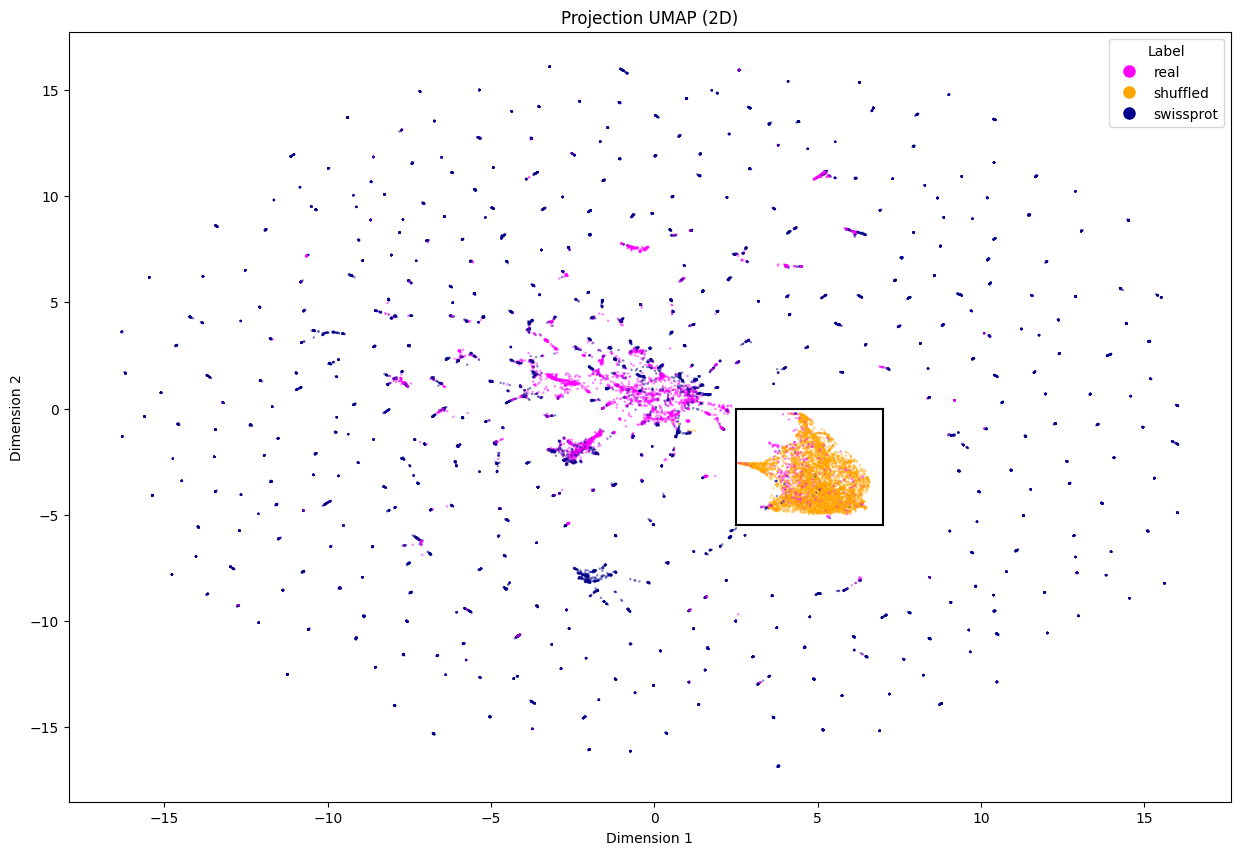

In [ ]:
colors={"real": "magenta", "shuffled": "orange", "swissprot": "darkblue"}
alphas={"real":.5, "shuffled": .5, "swissprot":.5}

rng = np.random.default_rng(42)
idx = rng.permutation(len(y))

# color per point
colors_per_point = np.array([colors[label] for label in y])

alpha_per_point = np.array([alphas[label] for label in y])

plt.figure(figsize=(15,10))
plt.scatter(
    X_umap_2d[idx, 0],
    X_umap_2d[idx, 1],
    c=colors_per_point[idx],
    s=3,
    alpha=alpha_per_point[idx],
    linewidths=0,
    rasterized=True
)
from matplotlib.lines import Line2D
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
legend_handles = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=colors[label], markersize=10, alpha=1.0, label=label)
    for label in sorted(np.unique(y))
]
plt.legend(handles=legend_handles, title="Label", loc='upper right', frameon=True)

xmin, xmax = plt.xlim()
print(f"limites axe x : {xmin}, {xmax}")
ymin, ymax = plt.ylim()
print(f"limites axe y : {ymin}, {ymax}")

plt.axvline(x=2.5,color="k", ymin=(-5.5-(ymin))/(ymax-ymin), ymax=(-(ymin))/(ymax-ymin))
plt.axvline(x=7,color="k", ymin=(-5.5-(ymin))/(ymax-ymin), ymax=(-(ymin))/(ymax-ymin))
plt.axhline(y=-5.5,color="k", xmin=(2.5-(xmin))/(xmax-xmin), xmax=(7-(xmin))/(xmax-xmin))
plt.axhline(y=0,color="k", xmin=(2.5-(xmin))/(xmax-xmin), xmax=(7-(xmin))/(xmax-xmin))
"""
plt.axvline(x=2.5,color="k", ymin=0.3575, ymax=0.51)
plt.axvline(x=7,color="k", ymin=0.3575, ymax=0.51)
plt.axhline(y=-5.5,color="k", xmin=0.575, xmax=0.7)
plt.axhline(y=0,color="k", xmin=0.575, xmax=0.7)
"""

plt.savefig('umap_swissprot.png', dpi=1600)
plt.show()

In [ ]:
def proteines_mappees_avec_shuffle(dictionnaire_prot, cat_prot) : # dictionnaire_prot : embeddings_original, embeddings_shuffle, embeddings_swissprot, cat prot : originale, shuffle ou swissprot
  liste_headers=[] # liste contenant les headers des protéines (de swissprot si swissprot choisi) qui se superposent avec les embeddings shuffle dans le UMAP
  indice_h=0 # indice des protéines dans le dictionnaire embeddings
  if cat_prot == 'originale' :
    i_min = 0
    i_max = len(dictionnaire_prot['headers'])
  if cat_prot == 'shuffle' :
    i_min = len(embeddings_original['headers'])
    i_max = len(embeddings_original['headers']) + len(dictionnaire_prot['headers'])
  if cat_prot == 'swissprot' :
    i_min = len(X_umap_2d) - len(dictionnaire_prot["headers"])
    i_max = len(X_umap_2d)
  for coord in X_umap_2d[i_min : i_max-1] :
    indice_h+=1
    if coord[0]>2.5 and coord[0]<7 and coord[1]>-5.5 and coord[1]<0:
      header=np.array(dictionnaire_prot['headers'][indice_h])
      liste_headers.append(header)
  return(liste_headers)

swissprot_headers=proteines_mappees_avec_shuffle(embeddings_swissprot, 'swissprot')
print(len(swissprot_headers)) # on retrouve 44 protéines issues de swissprot qui se retrouvent mappées avec les embeddings des shuffle par umap

shuffle_headers=proteines_mappees_avec_shuffle(embeddings_shuffle, 'shuffle')
print(len(shuffle_headers)) # 4199 protéines du shuffle qui sont regroupées au même endroit sur 4212

original_headers=proteines_mappees_avec_shuffle(embeddings_original, 'originale')
print(len(original_headers)) # 390 protéines des données réelles qui sont regroupées dans la même zone que celles du shuffle sur 4212

44
4199
390


In [ ]:
print(swissprot_headers)

[array('sp|A2BXZ2|RS16_PROM5', dtype='<U20'), array('sp|P0A3D5|FDXN_TRIAZ', dtype='<U20'), array('sp|P12415|FDXN_NOSS1', dtype='<U20'), array('sp|P73296|RL17_SYNY3', dtype='<U20'), array('sp|B7K837|RS12_GLOC7', dtype='<U20'), array('sp|Q8DML1|RS13_THEVB', dtype='<U20'), array('sp|P84330|LEC1_PLAAG', dtype='<U20'), array('sp|P73392|Y1735_SYNY3', dtype='<U21'), array('sp|Q2JJU2|Y2119_SYNJB', dtype='<U21'), array('sp|Q8DG60|PSB27_THEVB', dtype='<U21'), array('sp|A2C6W2|QUEF_PROM3', dtype='<U20'), array('sp|Q55777|DNCH_SYNY3', dtype='<U20'), array('sp|Q55371|Y903_SYNY3', dtype='<U20'), array('sp|Q8GJM6|MCDB_SYNE7', dtype='<U20'), array('sp|Q7U4J3|RL16_PARMW', dtype='<U20'), array('sp|A2BWL2|COAD_PROM5', dtype='<U20'), array('sp|A2C030|RNH_PROM1', dtype='<U19'), array('sp|A2BXB1|APT_PROM5', dtype='<U19'), array('sp|P07119|PHCB1_MICDP', dtype='<U21'), array('sp|P31525|Y1590_PICP2', dtype='<U21'), array('sp|Q0I9X3|Y1544_SYNS3', dtype='<U21'), array('sp|Q8YZV9|KHSE_NOSS1', dtype='<U20'), array

In [ ]:
header_swiss = embeddings_swissprot['headers']
print(len(header_swiss))

organism_list = {} # dictionnaire des organismes présents dans les données swissprot et le nombre de protéines correspondant
for h in header_swiss :
  l_header=h.split("|")
  organism=l_header[2].split("_")[1]
  if organism not in organism_list :
    organism_list[organism]=1
  else :
    organism_list[organism]+=1

print(f"Nombre d'organismes différents dans les protéines issues de swissprot : {len(organism_list)}")
print(f"Nombre de protéines issues de l'organisme PROM5 : {organism_list['PROM5']}") # 298 dont 4 mélangées au shuffle


fonction_list = {} # dictionnaire des fonctions référencées dans les données swissprot et le nombre de protéines correspondant
for h in header_swiss :
  l_header=h.split("|")
  fct=l_header[2].split("_")[0]
  if fct not in fonction_list :
    fonction_list[fct]=1
  else :
    fonction_list[fct]+=1

print(f"Nombre de fonctions totales dans les protéines de swissprot : {len(fonction_list)}")
print(f"Nombre de protéines associées à la fonction RS16 : {fonction_list['RS16']}")

13727
Nombre d'organismes différents dans les protéines issues de swissprot : 121
Nombre de protéines issues de l'organisme PROM5 : 297
Nombre de fonctions totales dans les protéines de swissprot : 1861
Nombre de protéines associées à la fonction RS16 : 35


In [ ]:
### ANCIEN TEST
# Charger le jeu de données exemple
data_reel=np.array([[8,5,9,3,4], [8,9,7,6,8], [4,7,9,6,5], [7,4,8,9,6]])

data_shuffle=np.array([[6,7,2,1,2], [3,4,2,5,2], [2,5,4,3,4], [1,2,3,4,5]])

X = data_reel # Données d'entrée : vecteurs
X2 = data_shuffle

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X2_standardized = scaler.fit_transform(X2)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)
X_umap_2d_2 = umap_2d.fit_transform(X2_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red")
plt.scatter(X_umap_2d_2[:, 0], X_umap_2d_2[:, 1], c="blue")
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()